--- 
# 📊 Step 1: Data Loading and Initial Exploration
**데이터 로드 및 초기 탐색**

In [1]:
# A/B 테스팅 분석을 위한 필수 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 마케팅 A/B 테스트 데이터셋 로드
df = pd.read_csv('marketing_ab_data.csv')

In [3]:
# 데이터셋의 구조와 내용 확인
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [4]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


---

# 🔍 Step 2: Data Quality Assessment
**데이터 품질 평가**

### 데이터 이해:  

- **test group**: 실험 조건(광고 vs 통제)  
  - `ad`: 사용자가 광고를 본 경우  
  - `psa`: 광고 대신 비광고 콘텐츠를 본 경우(통제 그룹)
- **converted**: 타깃 변수(구매 전환 여부, True/False)  
  - `True`: 구매 발생 / `False`: 구매 미발생
- **total ads**: 사용자에게 노출된 광고의 총 횟수
- **most ads day**: 광고를 가장 많이 본 요일
- **most ads hour**: 광고를 가장 많이 본 시간대


In [5]:
# 분석에 불필요한 컬럼 제거를 통한 데이터셋 정리
# 인덱스 컬럼과 사용자 ID 제거
df_clean = df.drop(['Unnamed: 0','user id'], axis=1)
df_clean.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [7]:
# 범주형 변수의 카테고리 개수가 적절한지 확인
df_cate = df[['test group','converted','most ads day','most ads hour']]
df_cate.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [8]:
# 범주형 변수의 카테고리가 적절한지 확인
for i in df_cate.columns:
    print(i,":",df_cate[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


---
# 📈 Step 3: Exploratory Data Analysis
**탐색적 데이터 분석**

### 전환 패턴 이해

## 1. Univariate analysis

**개별 변수 분포 이해**

각 변수를 독립적으로 분석하여 다음을 파악:
- 범주형 변수와 수치형 변수의 구분
- 변수별 분포 형태 및 중심 경향
- 데이터 품질 및 이상치 존재 여부
- 기준 전환율과 사용자 행동 패턴

**→ 각 변수를 독립적으로 분석하여 분포 패턴, 데이터 품질, 기준 전환율 등을 분석합니다.**


### 1.1. 범주형 변수

=== 'test group' 분포 분석 ===

ad: 564577명 (96.00%)
psa: 23524명 (4.00%)

total: 588101명 (100.00%)



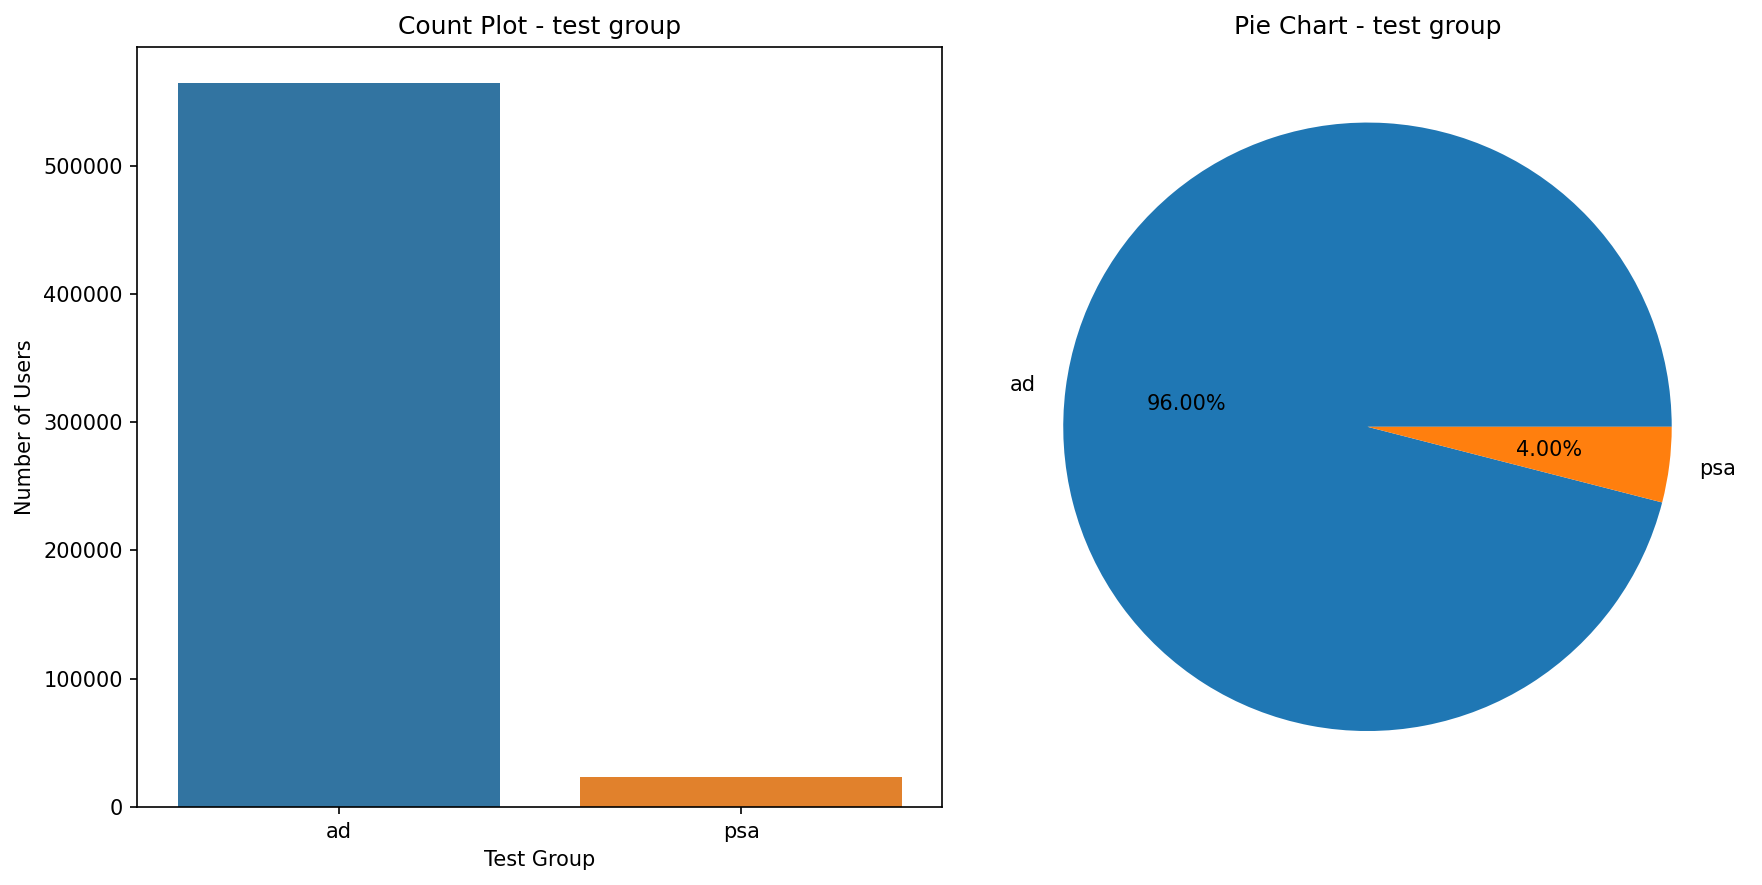

In [9]:
# 테스트 그룹 분포 분석
variable = 'test group'

print(f"=== '{variable}' 분포 분석 ===\n")

group_stats = df_cate[variable].value_counts()
group_rates = df_cate[variable].value_counts(normalize=True)*100

for group, count in group_stats.items():
    rate = group_rates[group]
    print(f"{group}: {count}명 ({rate:.2f}%)")

total_n = len(df_cate)
print(f"\ntotal: {total_n}명 (100.00%)\n")

# 시각화
plt.figure(figsize=(12,6),dpi=150)

# 카운트 플롯
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cate,hue=variable,palette='tab10')
plt.title(f"Count Plot - {variable}")
plt.xlabel('Test Group')
plt.ylabel('Number of Users')

# 파이 차트
colors = sns.color_palette('tab10')

plt.subplot(1,2,2)
counts = df_cate[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%',colors=colors)
plt.title(f'Pie Chart - {variable}')

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

광고 그룹(ad) 96%, 비광고 그룹(psa) 4%로 표본 크기가 불균형하지만, 주어진 데이터를 그대로 분석에 사용했습니다.

=== 목표 변수 'converted' 분석 ===

False: 573258명 (97.48%)
True: 14843명 (2.52%)

total: 588101명 (100.00%)



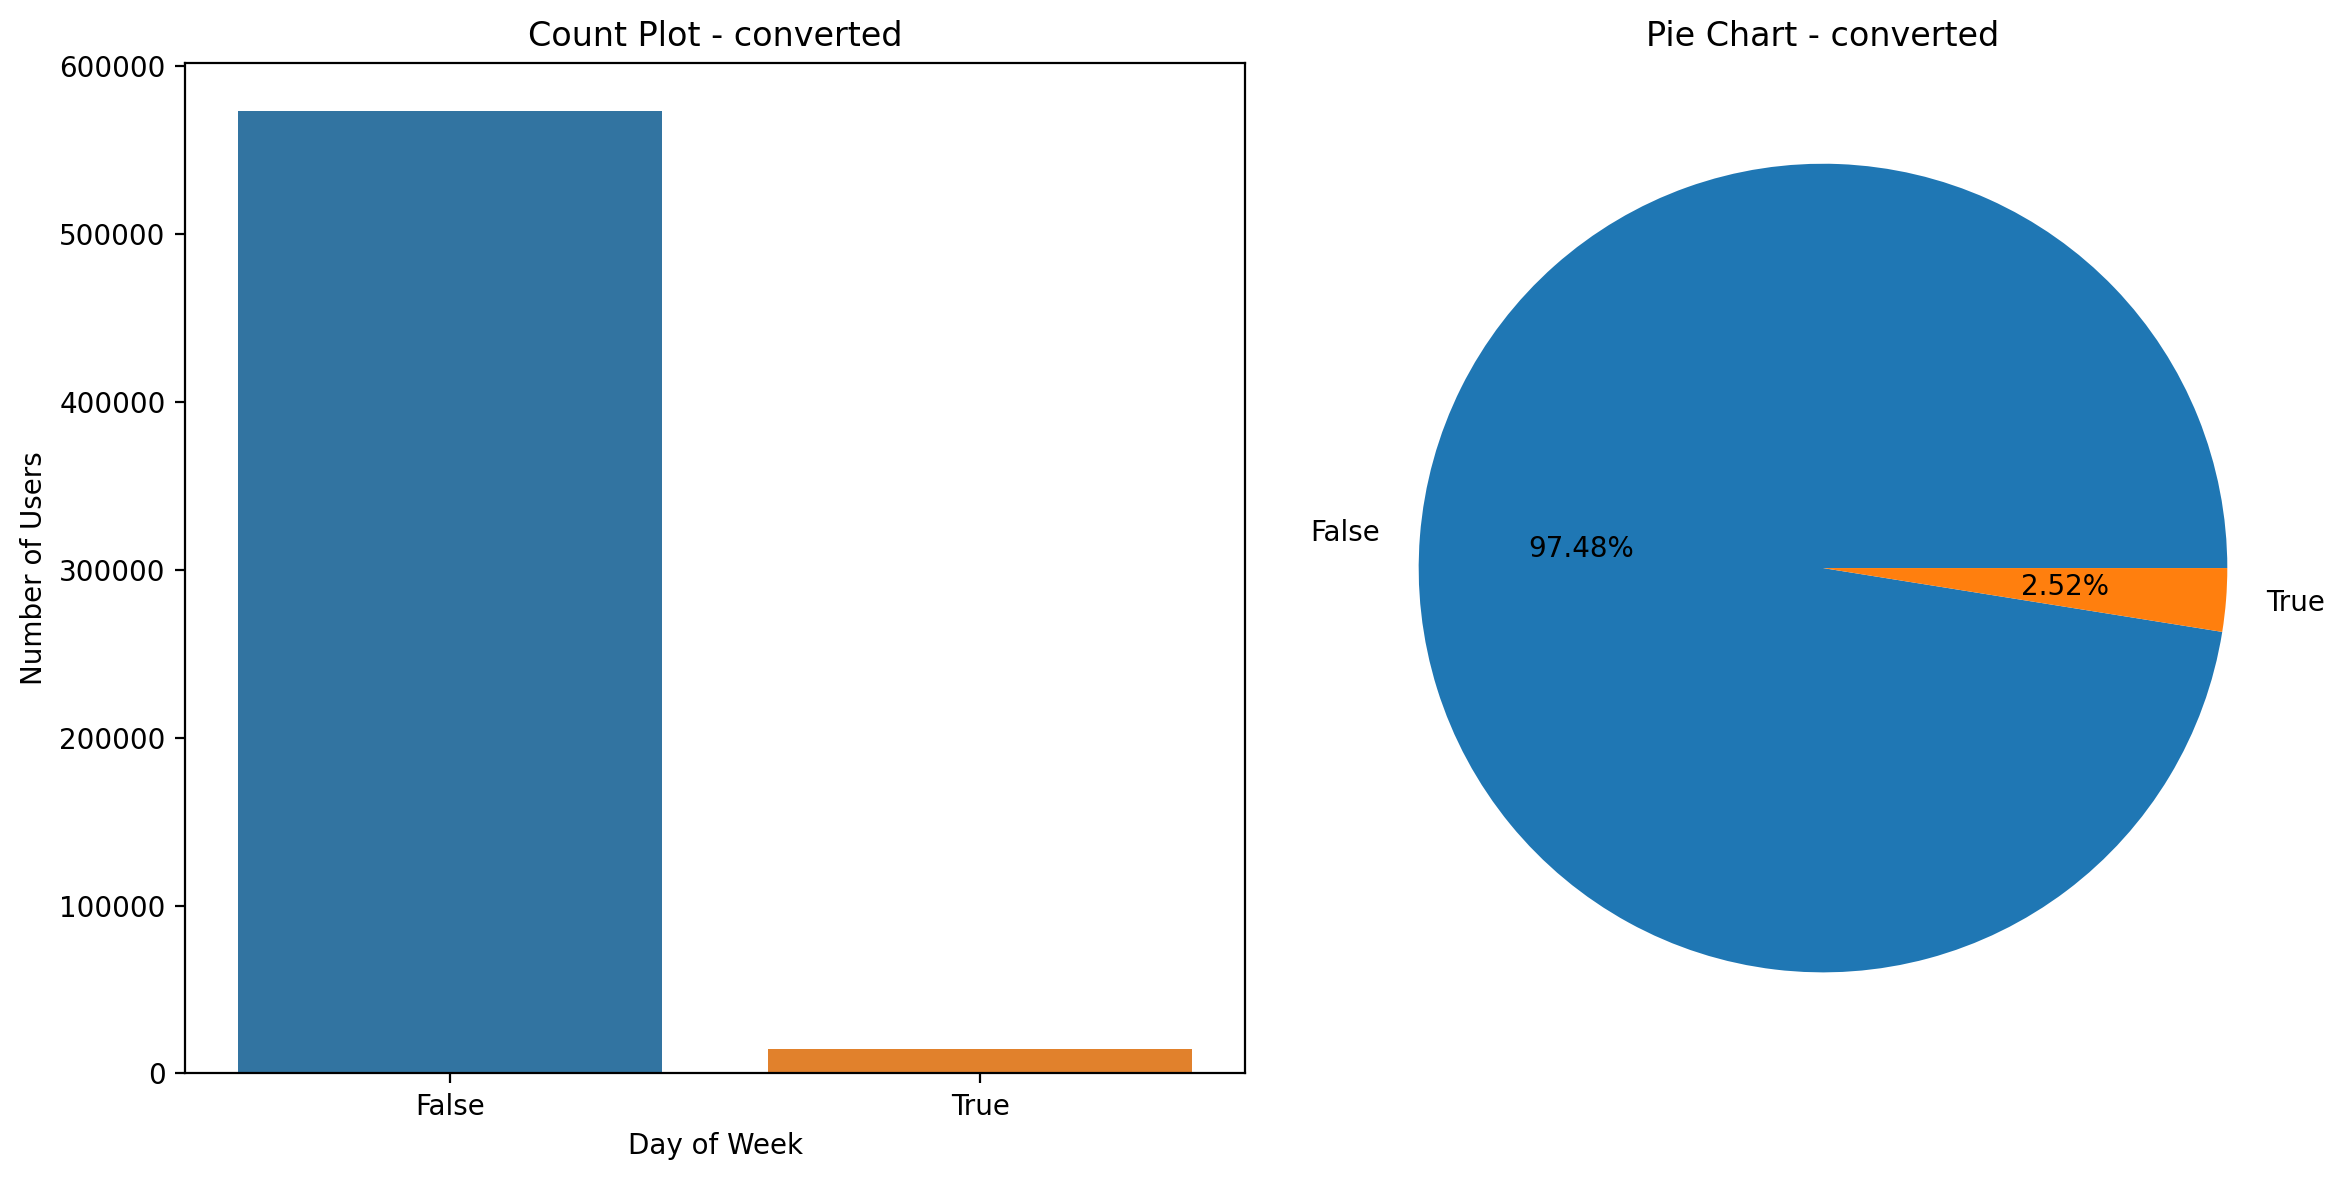

In [10]:
# 목표 변수인 전환 여부 분석
variable = 'converted'

print(f"=== 목표 변수 '{variable}' 분석 ===\n")

conversion_stats = df_cate[variable].value_counts()
conversion_rates = df_cate[variable].value_counts(normalize=True)*100

for status, count in conversion_stats.items():
    rate = conversion_rates[status]
    print(f"{status}: {count}명 ({rate:.2f}%)")

total_n = len(df_cate)
print(f"\ntotal: {total_n}명 (100.00%)\n")

# 시각화
plt.figure(figsize=(12,6),dpi=200)

order = df_cate[variable].value_counts().index
colors = sns.color_palette('tab10',len(order))
counts = df_cate[variable].value_counts()

# 카운트 플롯
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cate,order=order,
              hue=variable,hue_order=order,palette=colors,legend=False)
plt.title(f"Count Plot - {variable}")
plt.xlabel('Day of Week')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)

# 파이 차트
plt.subplot(1,2,2)
plt.pie(counts,labels=counts.index,autopct='%0.2f%%',colors=colors)
plt.title(f"Pie Chart - {variable}")

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

전체 사용자(ad + psa) 중 2.52%가 전환(구매)했습니다. 전환율이 매우 낮은 편입니다.

=== 'most ads day' 분석 ===

사용자별 광고 최다 노출 요일:
Friday: 92608명
Monday: 87073명
Sunday: 85391명
Thursday: 82982명
Saturday: 81660명
Wednesday: 80908명
Tuesday: 77479명


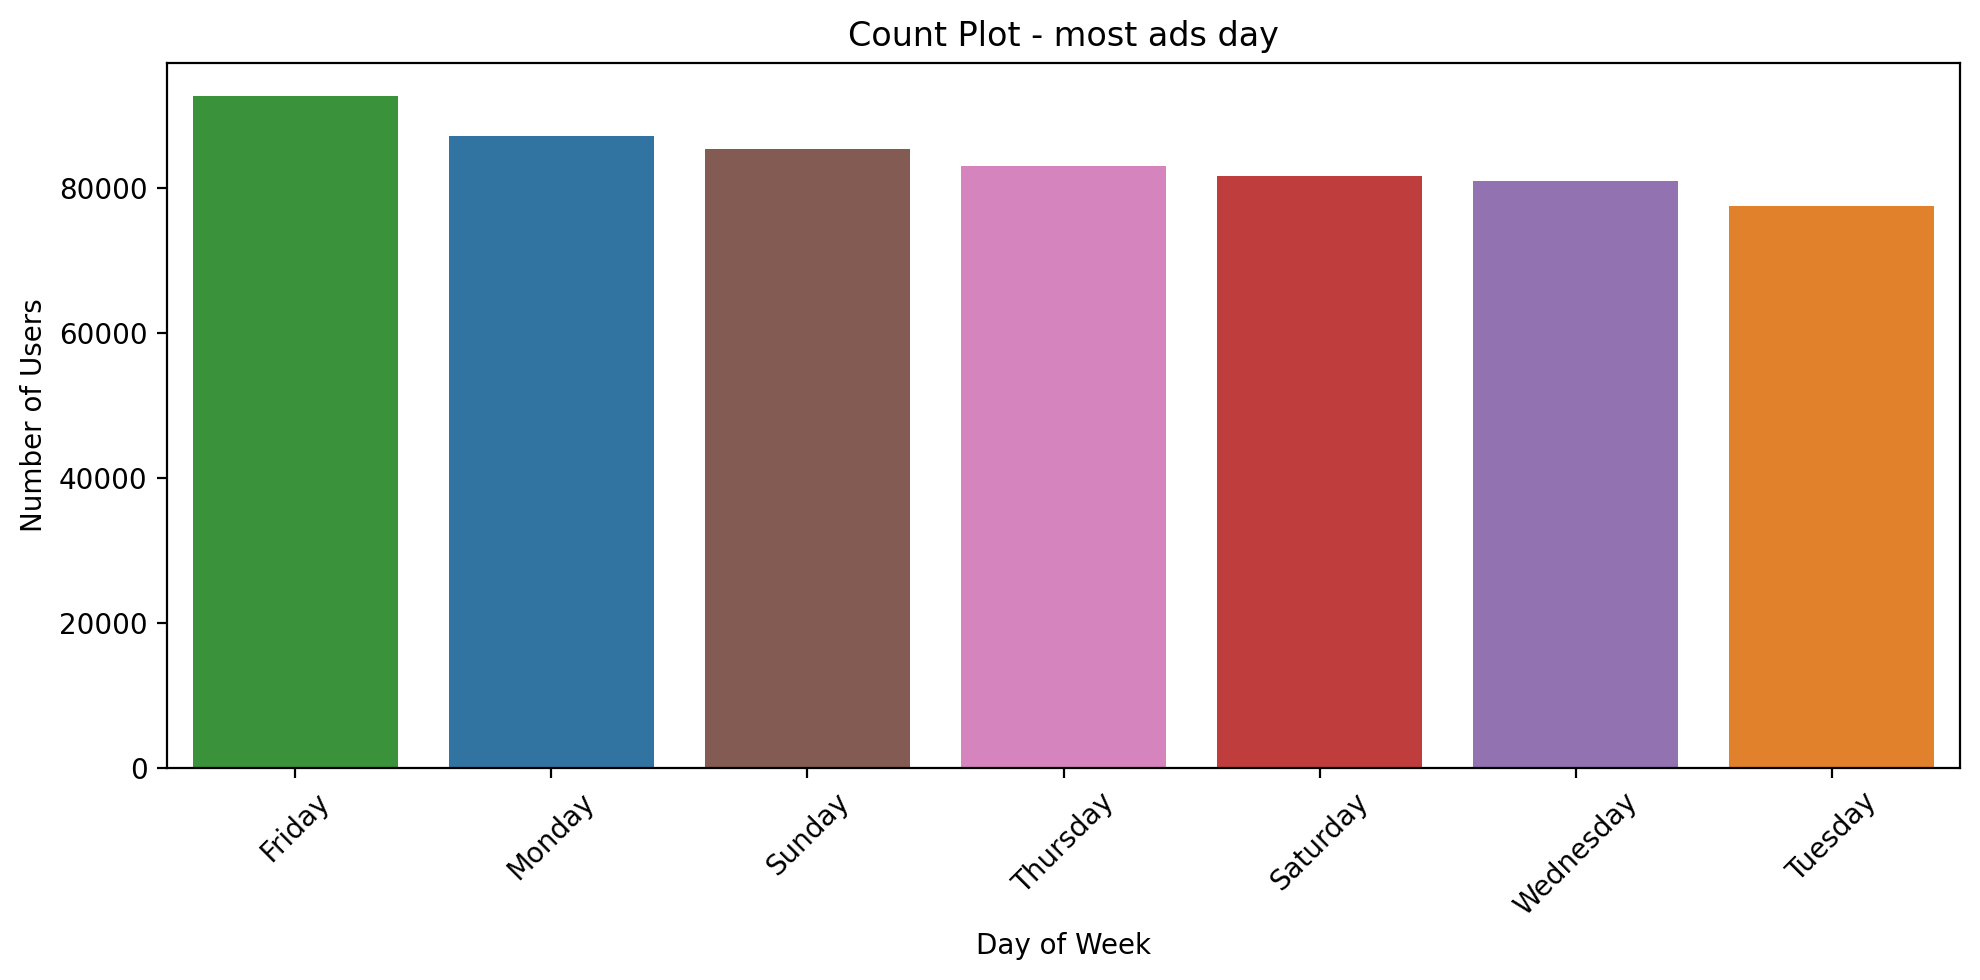

In [13]:
# 최다 광고 요일 분포 분석
variable = 'most ads day'

print(f"=== '{variable}' 분석 ===")

day_stats = df_cate[variable].value_counts()

print(f"\n사용자별 광고 최다 노출 요일:")
for day, count in day_stats.items():
    print(f"{day}: {count}명")

# 시각화
plt.figure(figsize=(10,5),dpi=200)

order = df_cate[variable].value_counts().index

# 카운트 플롯
sns.countplot(x=variable,data=df_cate,order=order,
              hue=variable,palette='tab10',legend=False)
plt.title(f"Count Plot - {variable}")
plt.xlabel('Day of Week')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)


# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

금요일에 광고를 가장 많이 본 사용자가 많았고, 화요일이 가장 적었습니다. 요일별로 비교적 고르게 분포되어 있습니다.

=== 'most ads hour' 분석 ===


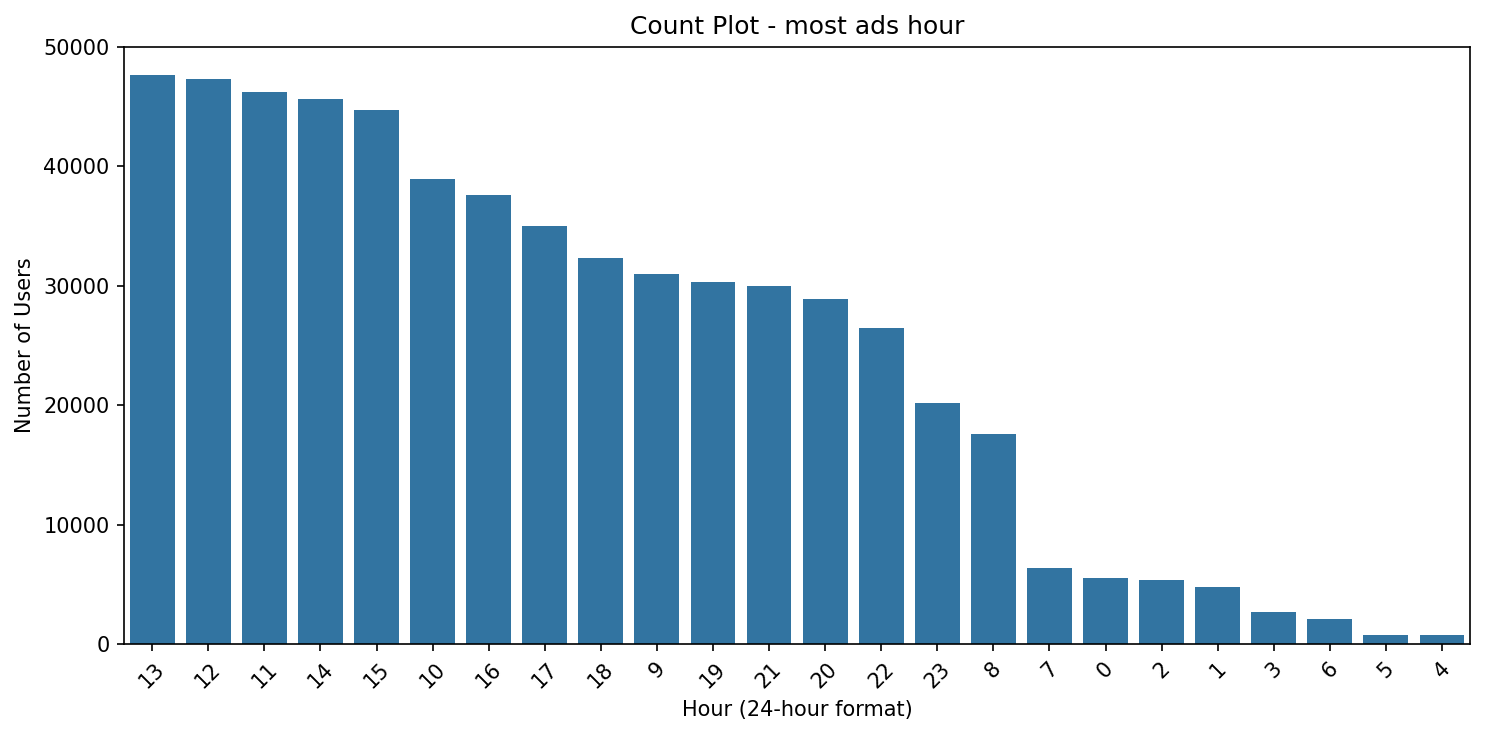

In [14]:
# 최다 광고 시간 분포 분석
variable = 'most ads hour'

print(f"=== '{variable}' 분석 ===")

# 시각화
plt.figure(figsize=(10,5),dpi=150)
order = df_cate[variable].value_counts().index

sns.countplot(x=variable,data=df_cate,order=order,legend=False)
plt.title(f'Count Plot - {variable}')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

오후 1시(13시)에 광고를 가장 많이 본 사용자가 많았고, 이후 점차 감소하다가 새벽 4-6시에 가장 적었습니다. 이는 사람들의 일상 패턴을 반영한 것으로 보입니다. 점심시간 이후 여유 시간에 접속이 많고, 수면 시간대(새벽)에는 접속이 적습니다.

### 1.2. 수치형 변수

In [15]:
# 총 광고 수 분포 분석 (수치형 변수)
print(f"=== 수치형 변수 'total ads' 분석 ===")

# 기술 통계
print(f"\nDescriptive Statistics:")
df['total ads'].describe().to_frame()

=== 수치형 변수 'total ads' 분석 ===

Descriptive Statistics:


,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


### 해석

평균은 약 25회이지만 중앙값이 13회로 평균보다 훨씬 낮습니다. 표준편차(43.72)가 매우 크고 최댓값이 2065회인 것으로 보아, **대부분은 광고를 적게 봤지만 일부가 매우 많이 본 right-skewed 분포**입니다.

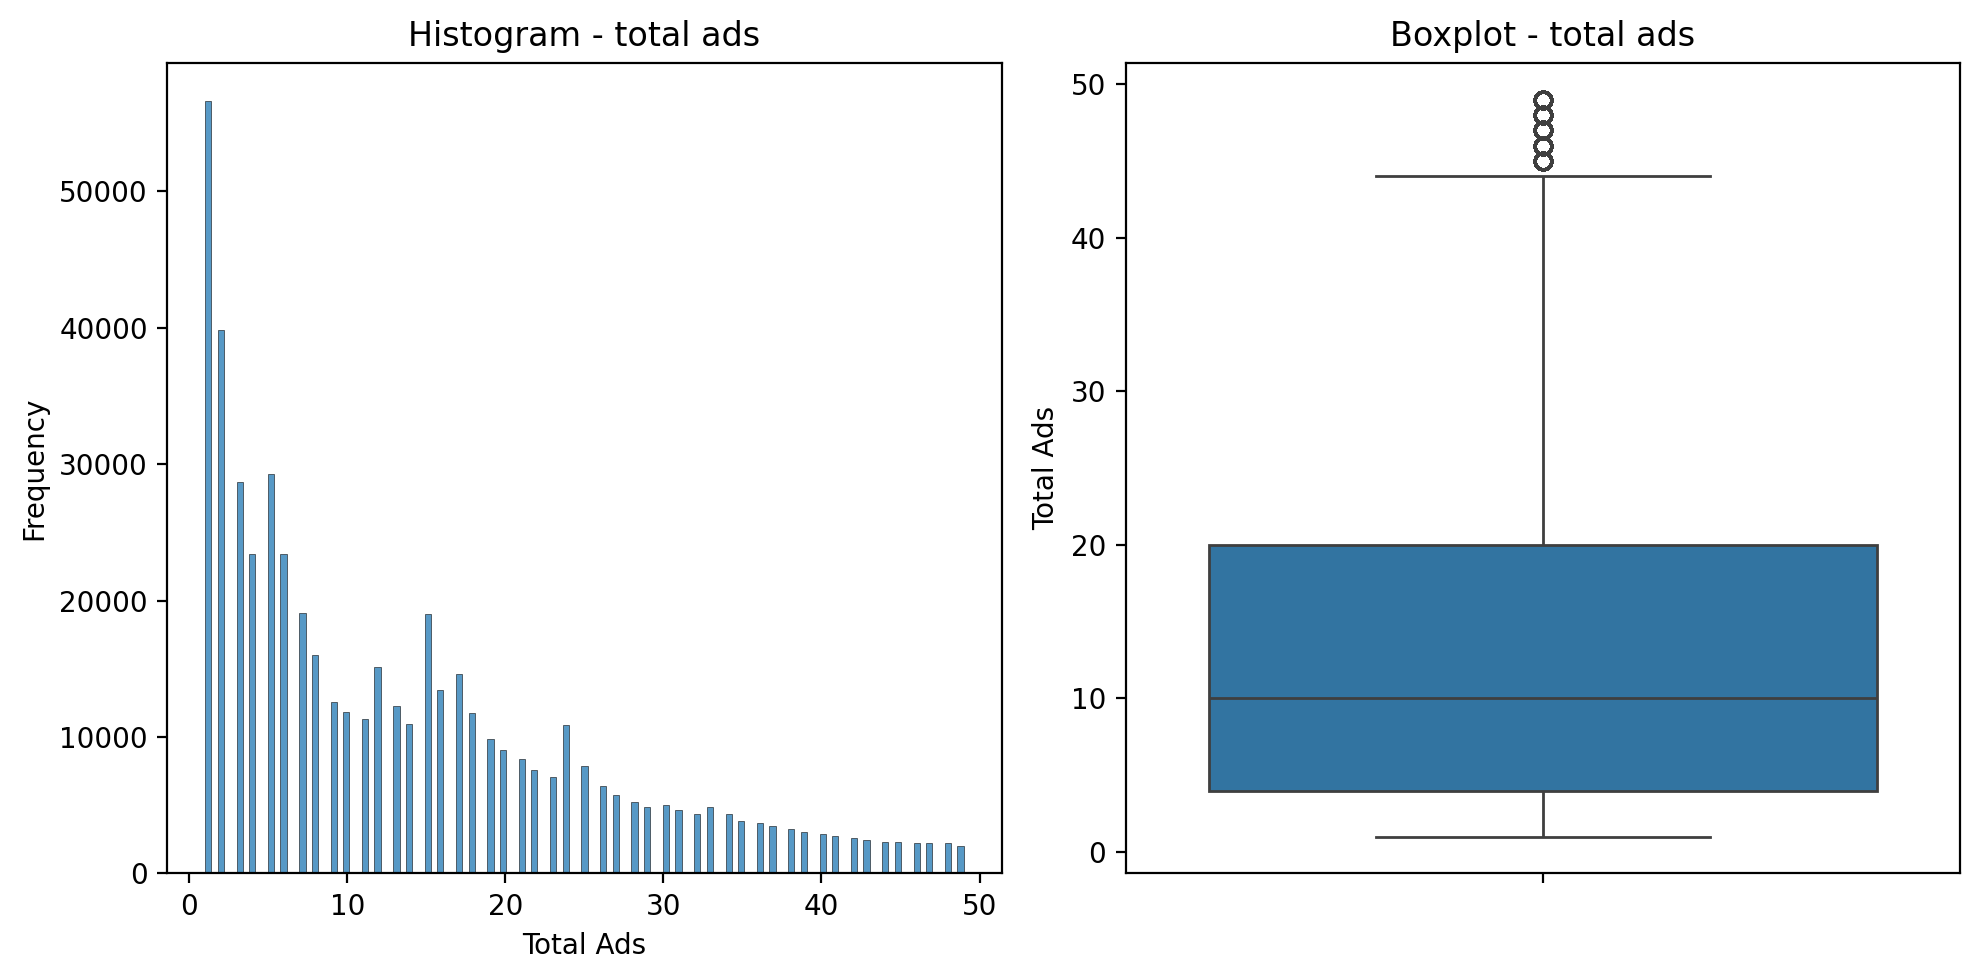

In [16]:
# 시각화
variable = 'total ads'

plt.figure(figsize=(10,5),dpi=200)

# 히스토그램
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df[df['total ads']<50]) # 더 나은 시각화를 위해 일부 극단값을 제외함
plt.title(f"Histogram - {variable}")
plt.xlabel('Total Ads')
plt.ylabel('Frequency')

# 박스 플롯
plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df[df['total ads']<50])
plt.title(f'Boxplot - {variable}')
plt.ylabel('Total Ads')

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

**히스토그램:** 광고를 1~5회 정도만 본 사람이 가장 많고(각 구간마다 수만 명), 광고 노출 횟수가 증가할수록 해당하는 사람의 수는 급격히 감소합니다. 광고를 30회 이상 본 사람은 매우 적습니다.

**박스플롯:** 중앙값이 약 13회(앞서 통계에서 확인)이고, 50%의 사람들이 4~27회 사이에 분포합니다. 하지만 일부는 45회 이상 광고를 봤으며(이상치), 최대 2065회까지 본 사람도 있습니다.

**종합:** 대부분의 사람은 광고를 적게 봤지만, 소수가 매우 많이 본 right-skewed 분포입니다.

## 2. Bivariate Analysis  
**이변량 분석**

### 변수들과 전환(Conversion) 간의 관계 탐색

전환 결과와 다른 변수들 간의 관계를 파악:

- 테스트 그룹 간 효과성 비교  
- 시간대별 전환 패턴 분석 (요일/시간 기준)  
- 광고 노출 횟수가 전환율에 미치는 영향 분석  

**→ 다양한 변수들이 구매 전환 결과와 어떤 관계를 갖는지 탐색하며, 테스트 그룹 효과, 시간적 패턴, 광고 노출의 영향을 중심으로 분석합니다.**


In [82]:
df_clean.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [17]:
# 테스트 그룹별 전환율 분석
print("=== 테스트 그룹별 전환 분석 ===")

# 그룹별 전환율 계산
group_conversion = df.groupby('test group')['converted'].agg(['count','sum','mean']).round(4)
group_conversion['conversion_rate_pct'] = group_conversion['mean'] * 100

print(f"\n테스트 그룹별 전환율:")
for group in group_conversion.index:
    count = group_conversion.loc[group,'count']
    conversions = group_conversion.loc[group,'sum']
    rate = group_conversion.loc[group,'conversion_rate_pct']
    print(f"{group}: {conversions}명/{count}명 = {rate:.3f}%")

print("\n")

group_conversion

=== 테스트 그룹별 전환 분석 ===

테스트 그룹별 전환율:
ad: 14423명/564577명 = 2.550%
psa: 420명/23524명 = 1.790%




,count,sum,mean,conversion_rate_pct
test group,,,,
ad,564577,14423,0.0255,2.55
psa,23524,420,0.0179,1.79


### 해석

광고 그룹(ad)의 전환율은 2.55%, 비광고 그룹(psa)은 1.79%로, 광고 그룹이 0.76%p 더 높습니다. 하지만 이 차이가 통계적으로 유의한지는 카이제곱 검정을 통해 확인해야 합니다.

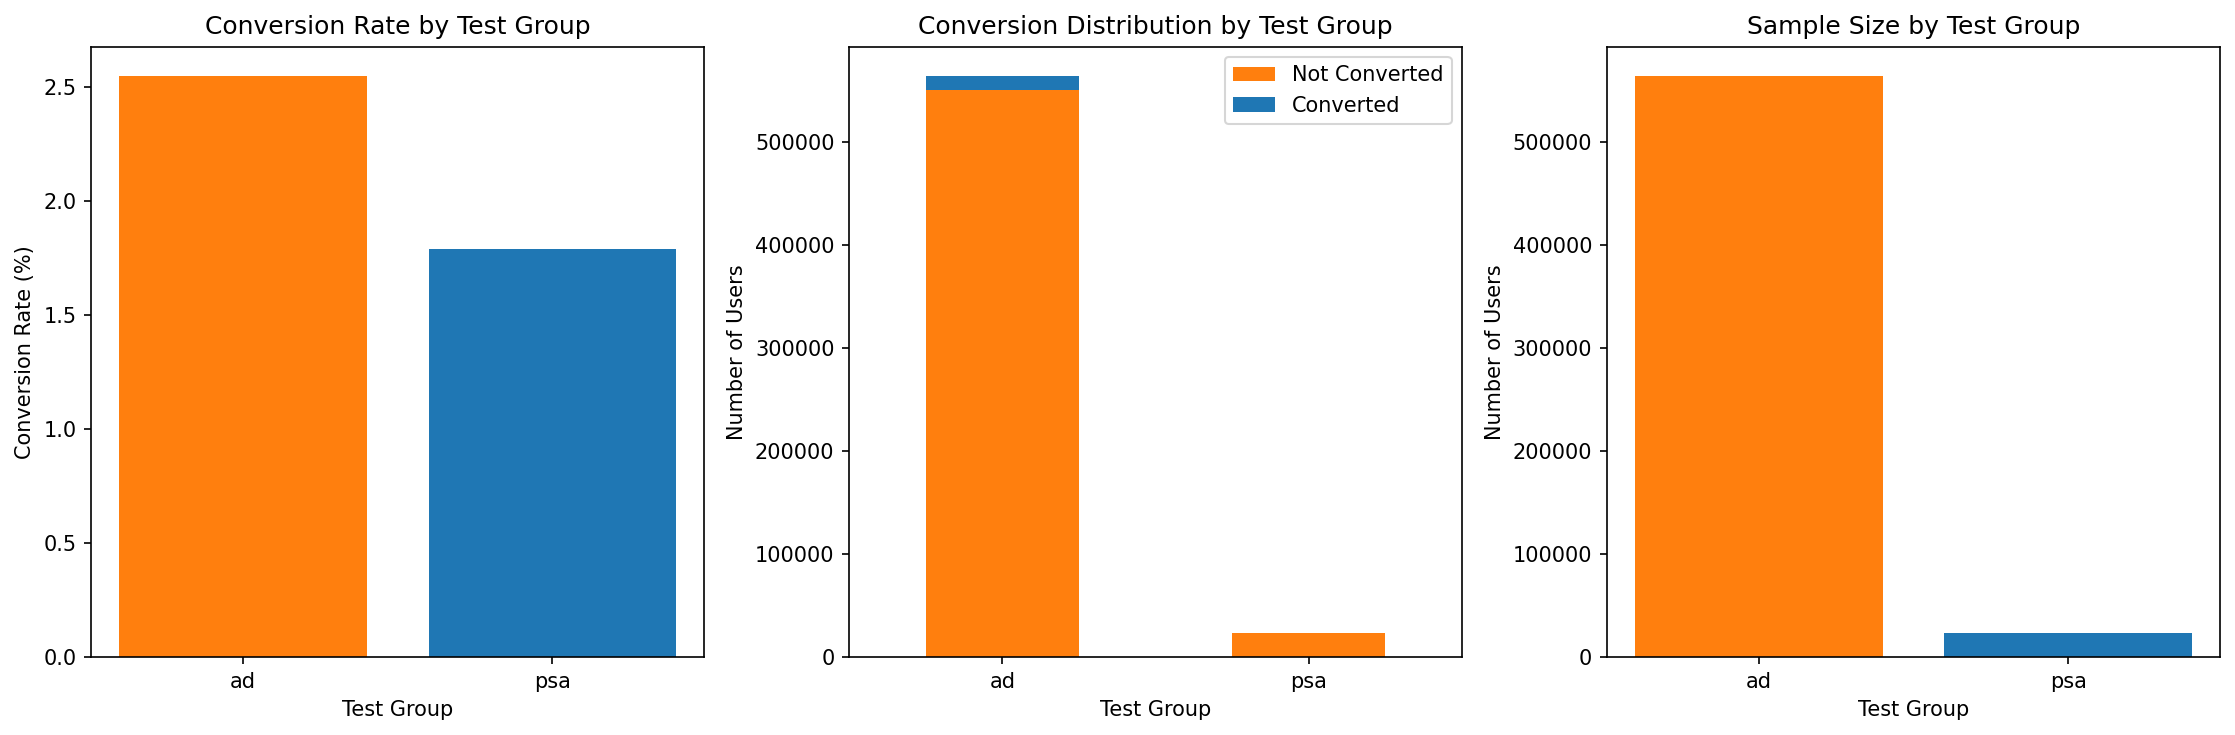

In [71]:
# 시각화
plt.figure(figsize=(15,5),dpi=150)

# 전환율 비교
plt.subplot(1,3,1)
bars = plt.bar(group_conversion.index, 
               group_conversion['conversion_rate_pct'],
               color=['#ff7f0e', '#1f77b4'])
plt.title('Conversion Rate by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate (%)')

# 전환/비전환 누적 막대 그래프
plt.subplot(1,3,2)
conv_crosstab = pd.crosstab(df['test group'], df['converted'])
conv_crosstab.plot(kind='bar',stacked=True,ax=plt.gca(),
                   color=['#ff7f0e', '#1f77b4'])
plt.title('Conversion Distribution by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Number of Users')
plt.legend(['Not Converted', 'Converted'])
plt.xticks(rotation=0)

# 샘플 사이즈 비교
plt.subplot(1,3,3)
sample_size = df['test group'].value_counts()
plt.bar(sample_size.index,sample_size.values,
        color=['#ff7f0e', '#1f77b4'])
plt.title('Sample Size by Test Group')
plt.ylabel('Number of Users')
plt.xlabel('Test Group')

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

**왼쪽 차트(전환율 비교):** 광고 그룹(ad)이 2.55%, 비광고 그룹(psa)이 1.79%로 ad 그룹이 약 0.76%p 높습니다.

**가운데 차트(전환 분포):** ad 그룹의 표본 크기가 압도적으로 크기 때문에 전환 수도 절대적으로 많아 보입니다(약 14,423명 vs 420명).

**오른쪽 차트(표본 크기):** ad 그룹이 약 564,577명, psa 그룹이 약 23,524명으로 약 24:1의 불균형이 있습니다. 이는 앞서 확인한 96:4 비율과 일치합니다.

In [19]:
# 요일별 전환율 분석
print("=== 요일별 전환율 분석 ===\n")

conv_day = pd.crosstab(df['most ads day'], 
                       df['converted'], 
                       normalize='index').sort_values(by=True,ascending=False)
conv_day.style.format('{:.2%}')

=== 요일별 전환율 분석 ===



converted,False,True
most ads day,,
Monday,96.72%,3.28%
Tuesday,97.02%,2.98%
Wednesday,97.51%,2.49%
Sunday,97.55%,2.45%
Friday,97.78%,2.22%
Thursday,97.84%,2.16%
Saturday,97.89%,2.11%


In [20]:
print(f"=== 요일별 전환율 (내림차순) ===\n")
day_conversion = df.groupby('most ads day')['converted'].agg(['count', 'sum', 'mean']).round(4)
day_conversion['conversion_rate_pct'] = day_conversion['mean'] * 100
day_conversion = day_conversion.sort_values('conversion_rate_pct', ascending=False)
day_conversion.style.format({'conversion_rate_pct': '{:.2f}%'})

=== 요일별 전환율 (내림차순) ===



,count,sum,mean,conversion_rate_pct
most ads day,,,,
Monday,87073,2857,0.032800,3.28%
Tuesday,77479,2312,0.029800,2.98%
Wednesday,80908,2018,0.024900,2.49%
Sunday,85391,2090,0.024500,2.45%
Friday,92608,2057,0.022200,2.22%
Thursday,82982,1790,0.021600,2.16%
Saturday,81660,1719,0.021100,2.11%


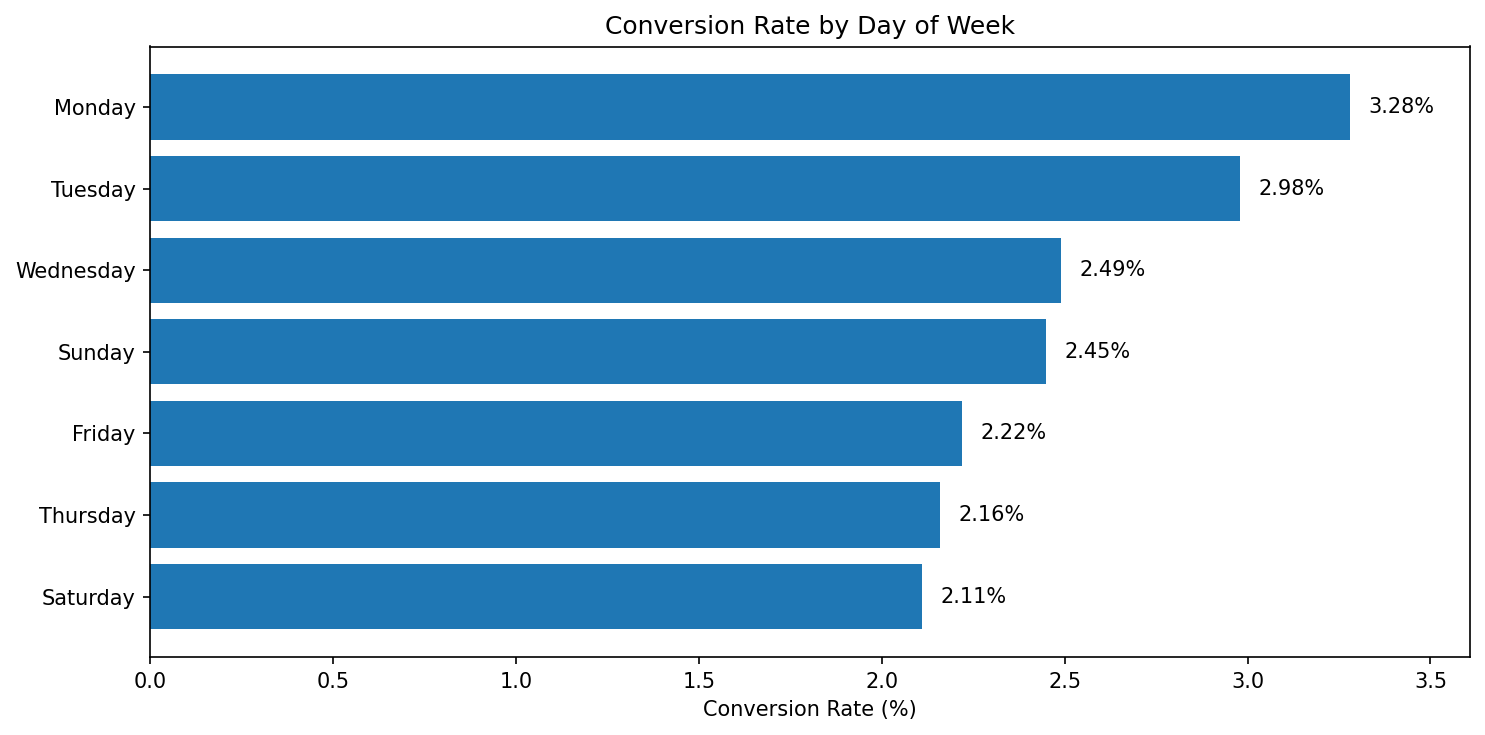

In [21]:
# 시각화
day_order = day_conversion.sort_values('conversion_rate_pct', ascending=True).index

plt.figure(figsize=(10, 5),dpi=150)

plt.barh(range(len(day_order)), 
         day_conversion.loc[day_order, 'conversion_rate_pct'])
plt.yticks(range(len(day_order)), day_order)
plt.xlabel('Conversion Rate (%)')
plt.title('Conversion Rate by Day of Week')

# Add percentage labels
for i, day in enumerate(day_order):
    rate = day_conversion.loc[day, 'conversion_rate_pct']
    plt.text(rate + 0.05, i, f'{rate:.2f}%', va='center')
plt.margins(x=0.1)

plt.tight_layout()
plt.show()

### 해석

월요일의 전환율이 3.28%로 가장 높고, 토요일이 2.11%로 가장 낮습니다. 주중 초반(월~화)의 전환율이 높고 주말로 갈수록 낮아지는 패턴을 보입니다. 이는 통계 검정을 통해 요일별 차이가 유의한지 확인이 필요합니다.

=== 시간별 전환 분석 ===

전환율 상위 5 시간대:
16시: 3.077% (n=37567)
20시: 2.980% (n=28923)
15시: 2.965% (n=44683)
21시: 2.892% (n=29976)
17시: 2.821% (n=34988)

전환율 하위 5 시간대:
2시: 0.731% (n=5333)
3시: 1.045% (n=2679)
1시: 1.291% (n=4802)
4시: 1.524% (n=722)
7시: 1.811% (n=6405)



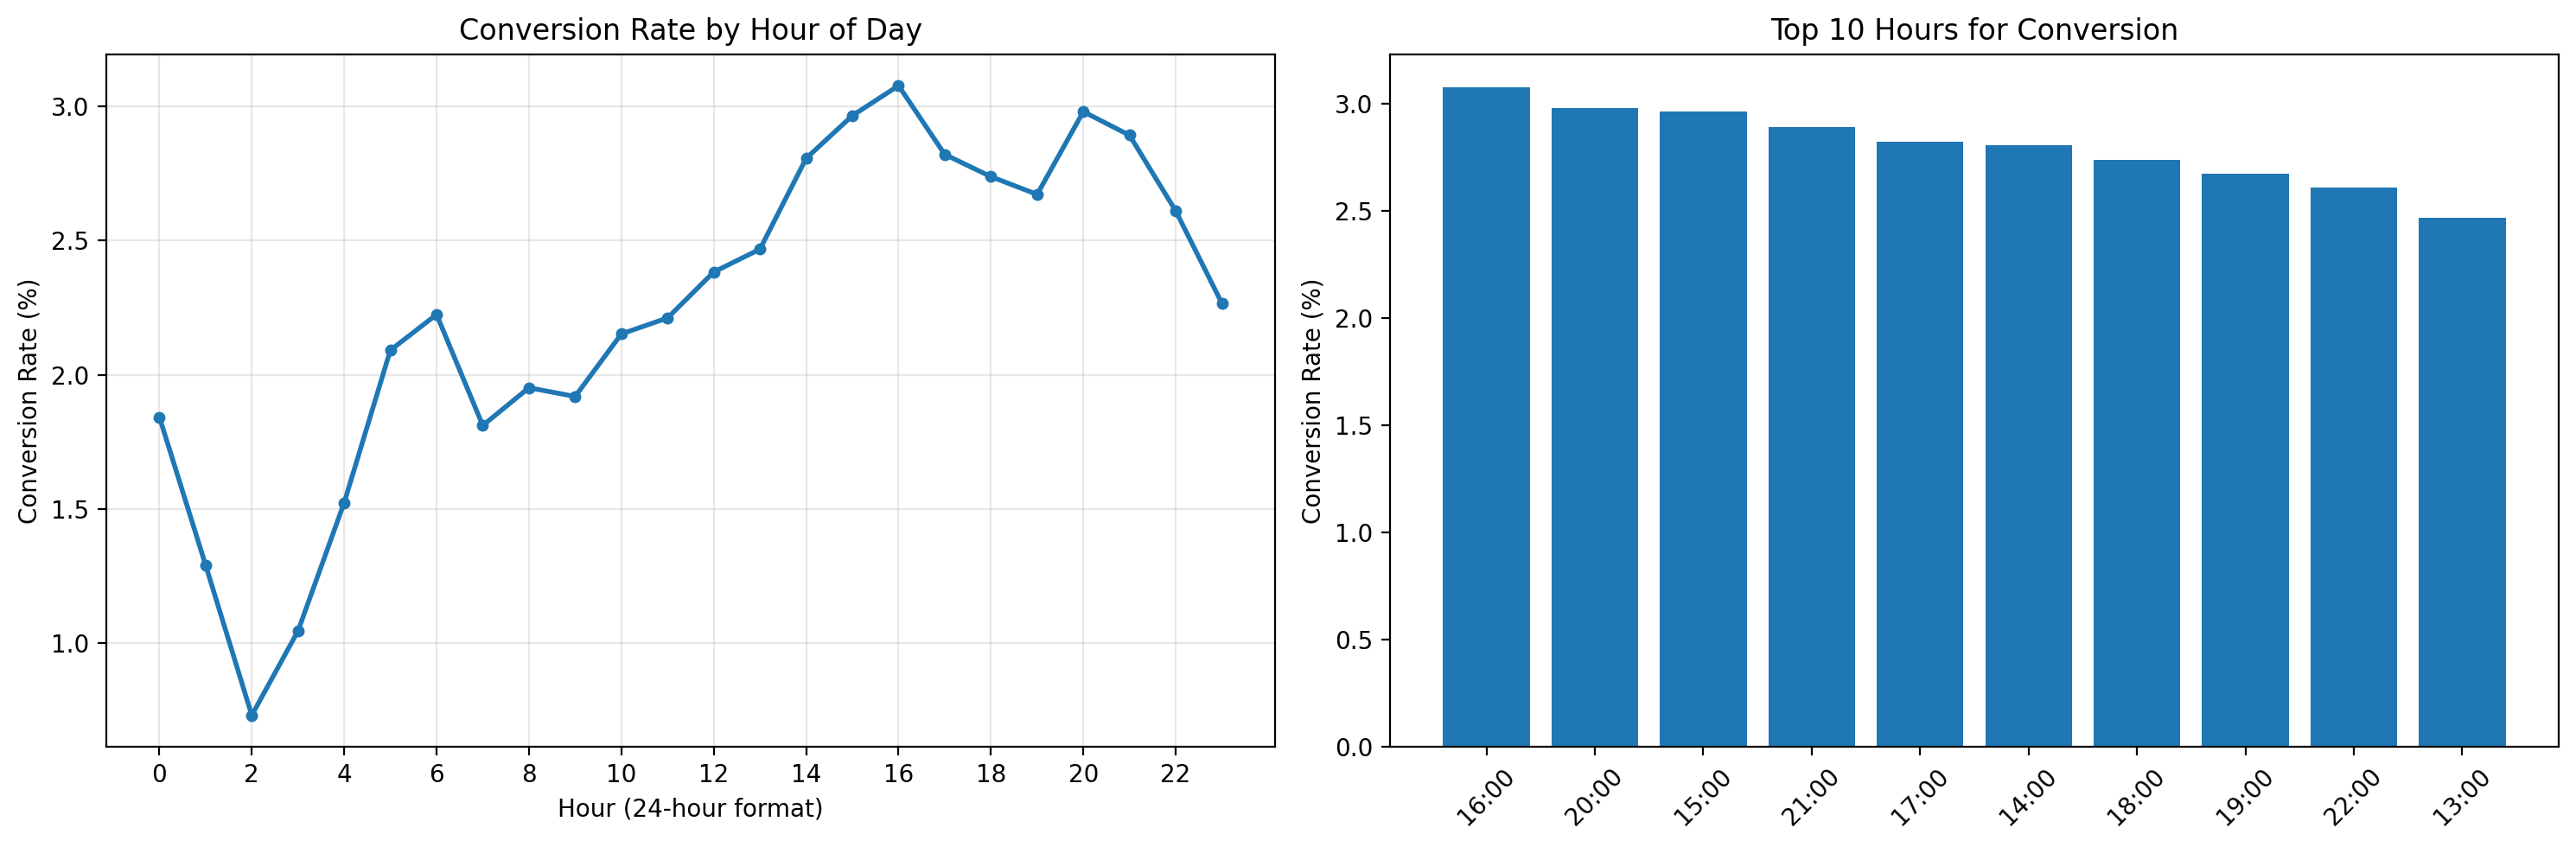

In [49]:
# 시간별 전환율 분석
print("=== 시간별 전환 분석 ===")

hour_conversion = df.groupby('most ads hour')['converted'].agg(['count','sum','mean'])
hour_conversion['conversion_rate_pct'] = hour_conversion['mean'] * 100

# 시간대별 전환율 상위 5 / 하위 5 확인
print(f"\n전환율 상위 5 시간대:")
top_hours = hour_conversion.sort_values('conversion_rate_pct',ascending=False).head()
for hour in top_hours.index:
    rate = top_hours.loc[hour,'conversion_rate_pct']
    count = top_hours.loc[hour,'count']
    print(f"{hour}시: {rate:.3f}% (n={count})")

print(f"\n전환율 하위 5 시간대:")
bottom_hours = hour_conversion.sort_values('conversion_rate_pct',ascending=True).head()
for hour in bottom_hours.index:
    rate = bottom_hours.loc[hour,'conversion_rate_pct']
    count = bottom_hours.loc[hour,'count']
    print(f"{hour}시: {rate:.3f}% (n={count})")

print("")

# 시간대별 전환율 변화 추이 (꺾은선 그래프)
plt.figure(figsize=(15,5),dpi=200)

plt.subplot(1,2,1)
hour_sorted = hour_conversion.sort_index()
plt.plot(hour_sorted.index, hour_sorted['conversion_rate_pct'],
         marker='o',linewidth=2,markersize=4)
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Hour of Day')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

# 전환율 상위 시간대 비교 (막대 그래프)
plt.subplot(1,2,2)
top_10_hours = hour_conversion.sort_values('conversion_rate_pct',ascending=False).head(10)
plt.bar(range(len(top_10_hours)),top_10_hours['conversion_rate_pct'])
plt.xticks(range(len(top_10_hours)),[f'{h}:00' for h in top_10_hours.index],rotation=45)
plt.ylabel('Conversion Rate (%)')
plt.title('Top 10 Hours for Conversion')

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

**왼쪽 차트(시간별 추이):** 오후 시간대(15 ~ 21시)에 전환율이 높고, 새벽 시간대(1 ~ 7시)에 가장 낮습니다. 특히 오후 4시(16시)가 3.08%로 최고점입니다.

**오른쪽 차트(상위 10 시간):** 상위 10개 시간대가 모두 오후~저녁 시간대로, 오후 여유 시간대에 전환이 많이 발생하는 패턴을 보입니다.

**종합:** 사람들의 일상 활동 패턴과 일치하며, 오후 시간대 마케팅 집중이 효과적일 수 있습니다.

In [43]:
# 광고 노출과 전환 간의 관계 분석
print("=== 광고 노출 vs 전환 비교 분석 ===")

# 전환 사용자와 비전환 사용자 간 광고 노출 비교 
exposure_by_conversion = df.groupby('converted')['total ads'].describe()
print("")
exposure_by_conversion

=== 광고 노출 vs 전환 비교 분석 ===



,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
False,573258.0,23.291495,40.863176,1.0,4.0,13.0,26.0,2065.0
True,14843.0,83.887759,87.455498,1.0,35.0,64.0,103.0,1778.0


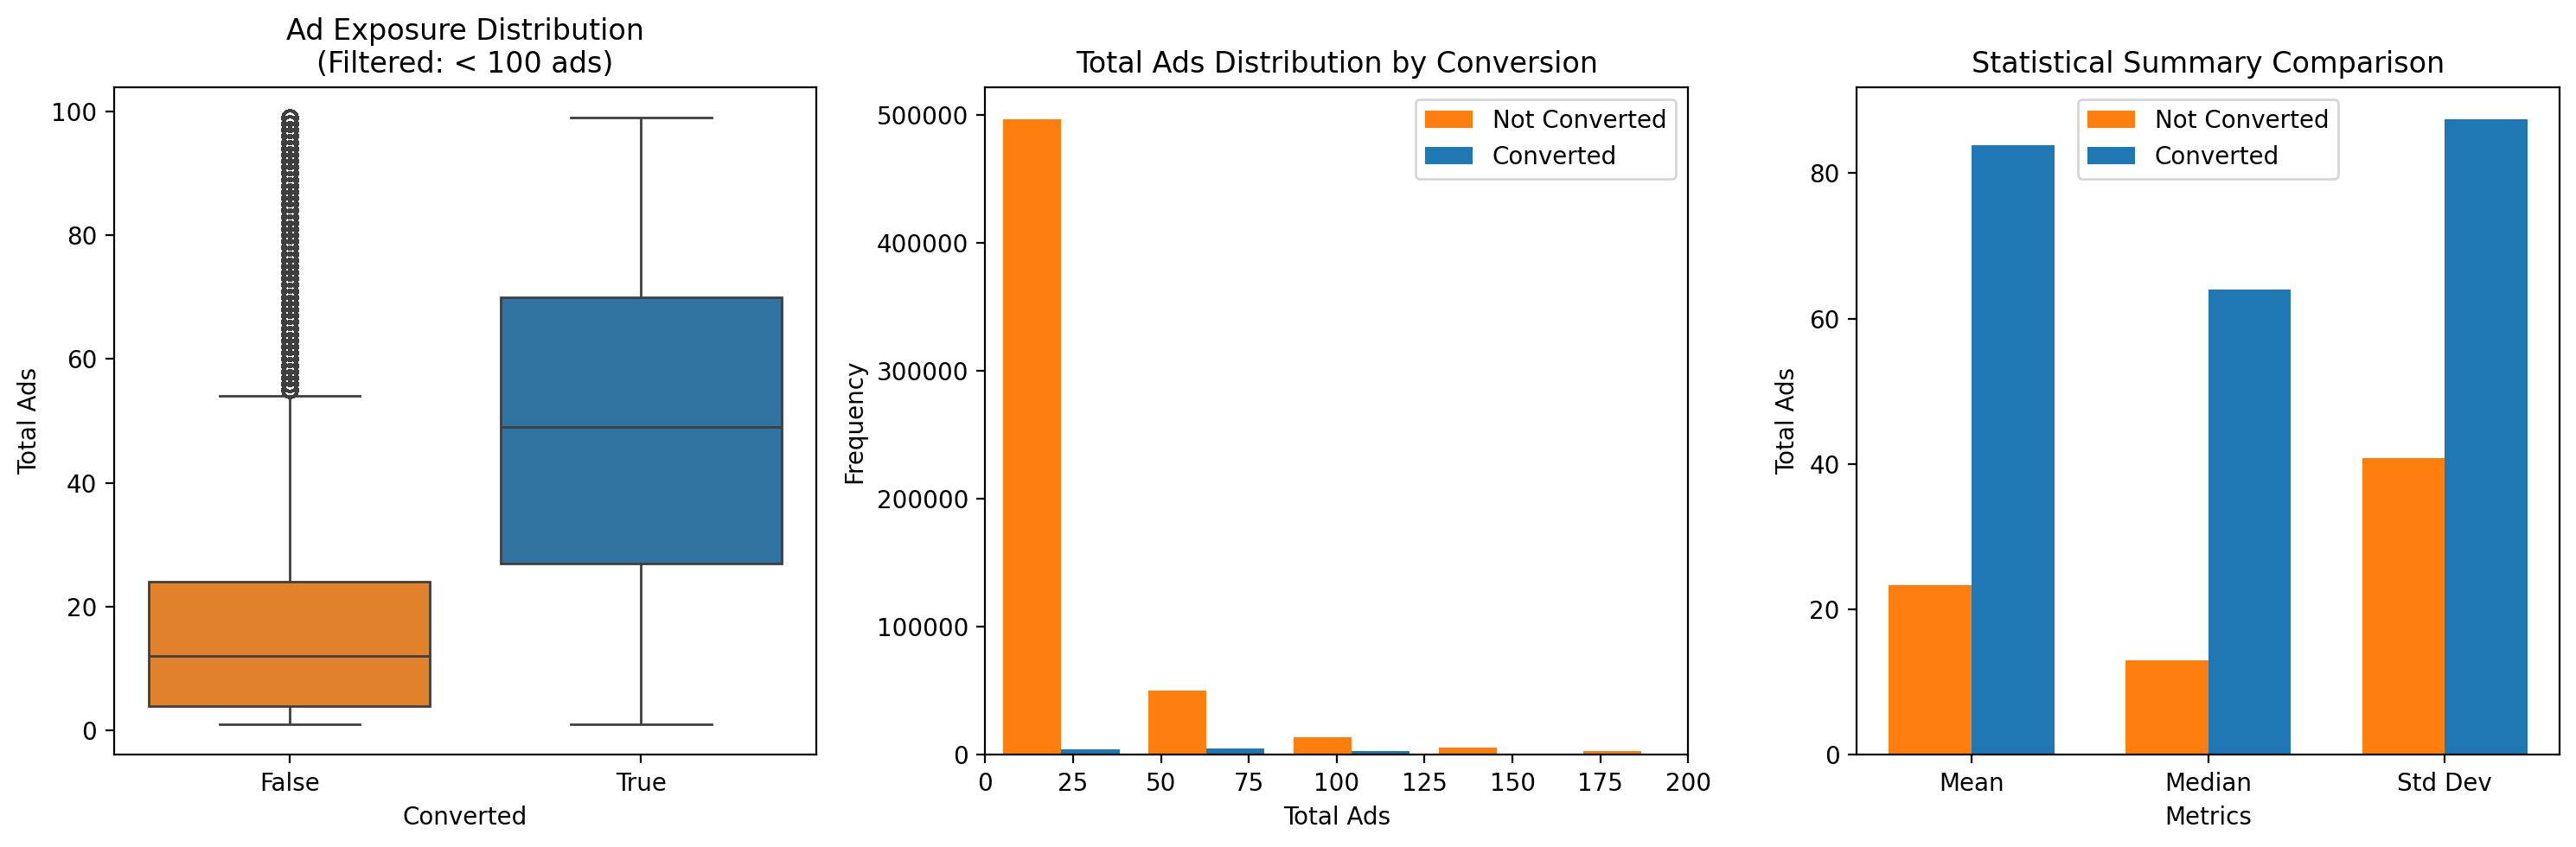

In [55]:
# 시각화
plt.figure(figsize=(15,5),dpi=200)
palette = {
    False: '#ff7f0e',   # 비전환
    True: '#1f77b4'     # 전환
}


# 박스 플롯
plt.subplot(1,3,1)
sns.boxplot(x='converted',y='total ads',data=df[df['total ads']<100],
            hue='converted',palette=palette,legend=False)
plt.title('Ad Exposure Distribution\n(Filtered: < 100 ads)')
plt.xlabel('Converted')
plt.ylabel('Total Ads')

# 히스토그램 비교
plt.subplot(1,3,2)
converted_users = df[df['converted'] == True]['total ads']
non_converted_users = df[df['converted'] == False]['total ads']

plt.hist([non_converted_users,converted_users],
         bins=50,label=['Not Converted','Converted'],
         color=['#ff7f0e', '#1f77b4']
)
plt.title('Total Ads Distribution by Conversion')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 200)

# 기본 통계 요약
plt.subplot(1,3,3)
summary_data={
    'Metric':['Mean','Median','Std Dev'],
    'Not Converted':[
        non_converted_users.mean(),
        non_converted_users.median(),
        non_converted_users.std()
    ],
    'Converted':[
        converted_users.mean(),
        converted_users.median(),
        converted_users.std()
    ]
}

x = np.arange(len(summary_data['Metric']))
width = 0.35

plt.bar(x-width/2,summary_data['Not Converted'],width,label='Not Converted',color='#ff7f0e')
plt.bar(x+width/2,summary_data['Converted'],width,label='Converted',color='#1f77b4')

plt.xlabel('Metrics')
plt.ylabel('Total Ads')
plt.title('Statistical Summary Comparison')
plt.xticks(x, summary_data['Metric'])
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 해석

**왼쪽 차트(박스플롯):** 전환한 그룹(True)이 비전환 그룹(False)보다 광고를 훨씬 많이 봤습니다. 전환 그룹의 중앙값은 약 64회, 비전환 그룹은 약 13회입니다.

**가운데 차트(분포):** 비전환 그룹은 0~30회 구간에 집중되어 있고, 전환 그룹은 더 넓게 분산되어 있으며 일부는 100회 이상 광고를 봤습니다.

**오른쪽 차트(통계 비교):** 전환 그룹의 평균(83.9회), 중앙값(64회), 표준편차(87.5) 모두 비전환 그룹보다 높습니다. 광고 노출 횟수가 전환과 관련이 있을 가능성을 보여줍니다.

---
# 🧪 Step 4: Statistical Hypothesis Testing  
**통계적 가설 검정**

### A/B 테스트 결과 검증을 위한 가설 검정

관측된 결과를 바탕으로 적절한 통계적 검정을 적용하여 다음을 판단합니다.

- 관찰된 차이가 **통계적으로 유의미한지 여부**
- 어떤 요인들이 **전환율에 유의한 영향을 미치는지**
- 도출된 결과를 바탕으로 한 **비즈니스 의사결정의 신뢰도**

### 검정 접근 방법

1. **범주형 변수**  
변수 간 독립성 검정을 위해 **카이제곱 검정(Chi-squared test)** 적용  

2. **수치형 변수**  
가정 조건을 먼저 검토한 후조건에 맞는 적절한 통계 검정 방법 선택


In [56]:
# 통계 검정 라이브러리
from scipy.stats import chi2_contingency

### 1. 범주형 변수 검정

**귀무가설**: 범주형 변수의 여러 수준에 대해 전환율에 차이가 없음  
**대립가설**: 범주 간 전환율에 유의한 차이가 있음

### Note
1. test group vs 전환 카이제곱 검정
   - 테스트 그룹별로 전환율(전환 여부)에 통계적으로 유의미한 차이가 있는지 확인
2. most ads day vs 전환 카이제곱 검정
   - 광고를 가장 많이 본 요일이 고객의 전환율에 통계적으로 영향을 미치는지 확인
3. most ads hour vs 전환 카이제곱 검정
   - 하루 중 광고를 가장 많이 본 시간대가 고객의 전환율에 통계적으로 영향을 미치는지 확인

In [67]:
# 범주형 변수에 대한 카이제곱 검정
print("=== 카이제곱 독립성 검정 ===")

alpha = 0.05
for variable in df_cate.columns:
    if variable != 'converted':
        # Contingency table 생성
        contingency_table = pd.crosstab(df_cate[variable],df_cate['converted'])

        # 카이제곱 검정 수행
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # 결과 출력        
        print(f"\n[{variable}] vs 전환 카이제곱 검정")
        print(f"• Chi-squared value: {chi2:.4f}")

        # 원래 값과 간단한 표현 모두 표시
        if p < 0.001:
            print(f"• p-value: {p:.2e} (< 0.001, 매우 작음)")
        else:
            print(f"•p-value: {p:.3f}")

        # 유의성 확인
        if p < alpha:
             print(f"✅ {variable}에 따른 전환율 차이가 통계적으로 유의함")
        else:
             print(f"❌ {variable}에 따른 유의한 차이 없음")

=== 카이제곱 독립성 검정 ===

[test group] vs 전환 카이제곱 검정
• Chi-squared value: 54.0058
• p-value: 2.00e-13 (< 0.001, 매우 작음)
✅ test group에 따른 전환율 차이가 통계적으로 유의함

[most ads day] vs 전환 카이제곱 검정
• Chi-squared value: 410.0479
• p-value: 1.93e-85 (< 0.001, 매우 작음)
✅ most ads day에 따른 전환율 차이가 통계적으로 유의함

[most ads hour] vs 전환 카이제곱 검정
• Chi-squared value: 430.7687
• p-value: 8.03e-77 (< 0.001, 매우 작음)
✅ most ads hour에 따른 전환율 차이가 통계적으로 유의함


### 검정 결과 해석

**1. test group vs 전환**  
광고 그룹(ad)과 비광고 그룹(psa)의 전환율 차이가 통계적으로 유의합니다(p < 0.001). 하지만 실제 차이는 0.76%p로 작습니다(ad 2.55% vs psa 1.79%). 표본 크기가 매우 커서(588,100명) 작은 차이도 유의하게 나타났을 가능성이 있습니다.

**2. most ads day vs 전환**  
요일별 전환율 차이가 통계적으로 유의합니다(p < 0.001). 월요일(3.28%)이 가장 높고 토요일(2.11%)이 가장 낮습니다. 주중 초반에 마케팅을 집중하는 전략을 고려할 수 있습니다.

**3. most ads hour vs 전환**  
시간대별 전환율 차이가 통계적으로 유의합니다(p < 0.001). 오후 시간대(15 ~ 21시)가 높고 새벽(1 ~ 7시)이 낮습니다. 오후 시간대에 광고를 집중 배치하는 것이 효과적일 수 있습니다.

### 주의사항

표본 불균형(ad:psa = 96:4)과 큰 표본 크기로 인해, 통계적 유의성이 반드시 실용적 중요성을 의미하지는 않습니다. 예를 들어, test group의 경우 p-value는 유의하지만 실제 전환율 차이가 0.76%p에 불과하므로, "광고 예산을 대폭 증액할 만큼 효과가 크다"고 판단하기는 어렵습니다. 비즈니스 의사결정 시 통계적 유의성뿐만 아니라 실제 효과 크기와 비용 대비 효과도 함께 고려해야 합니다.

In [68]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

### 2. 수치형 변수 검정

본 프로젝트에서는 수치형 변수(`total ads`)에 대한 검정은 범위에서 제외했습니다.

**제외 이유:**
- 데이터셋의 주요 변수가 범주형 중심
- 범주형 변수 검정으로도 A/B 테스트의 핵심 질문("광고 노출이 전환율을 높이는가?")에 답할 수 있음
- 정규성, 등분산성 등 수치형 검정의 가정 조건 확인 및 적절한 검정 선택은 향후 학습 과제로 설정

**향후 확장 방향:**
- '전체 광고 수'가 전환/비전환 그룹 간 유의한 차이가 있는지 검정 필요
- `total ads`의 정규성 가정 확인 (Shapiro-Wilk test)
- 적절한 검정 선택(t-test 또는 Mann-Whitney U test)
- 효과 크기(effect size) 분석으로 실용적 유의성 평가

---
# 🎯 Step 5: Project Summary
**분석 결과 요약 및 핵심 발견사항**


## 주요 발견사항

1. **광고 효과 검증**  
광고 그룹(ad)과 비광고 그룹(psa)의 전환율 차이는 통계적으로 유의했지만(p < 0.001), 실제 차이는 0.76%p로 매우 작았습니다(ad 2.55% vs psa 1.79%). 표본 크기가 매우 크기 때문에(588,100명) 작은 차이도 유의하게 나타났을 가능성이 높습니다.

2. **요일 패턴**  
요일별 전환율에 통계적으로 유의한 차이가 있었습니다(p < 0.001). 월요일의 전환율이 3.28%로 가장 높았고, 토요일이 2.11%로 가장 낮았습니다. 주중 초반의 전환율이 높은 패턴을 보였습니다.

3. **시간대 패턴**  
시간대별 전환율에도 통계적으로 유의한 차이가 있었습니다(p < 0.001). 오후 시간대(15 ~ 21시)의 전환율이 높았고(최고 3.08%), 새벽 시간대(1 ~ 7시)가 낮았습니다(최저 0.73%). 사람들의 일상 패턴과 일치하는 결과입니다.

4. **광고 노출 횟수와 전환의 관계**  
전환한 사람들이 평균 83.9회의 광고를 본 반면, 전환하지 않은 사람들은 평균 23.3회만 봤습니다. 광고 노출 횟수가 많을수록 전환 가능성이 높아지는 경향을 보였습니다.

5. **범주형 변수만으로도 의미있는 분석 가능**  
검정한 모든 범주형 변수(test group, most ads day, most ads hour)에서 전환율과 통계적으로 유의한 관계가 확인되었습니다(모두 p < 0.001). 수치형 변수 검정 없이도 범주형 변수 분석만으로 광고 전략에 대한 실행 가능한 인사이트(요일별, 시간대별 최적화)를 도출할 수 있었습니다.

<br><br>

## 현실적 평가

1. **통계적 유의성 vs 실용적 중요성**  
광고 그룹의 전환율이 통계적으로 유의하게 높았지만, 실제 차이(0.76%p)는 비즈니스적으로 큰 의미가 있는지 재검토가 필요합니다. 광고 운영 비용 대비 전환율 개선 효과가 충분한지 평가해야 합니다.

2. **데이터 제약사항**  
표본 불균형(ad 96% vs psa 4%)으로 인해 두 그룹 간 비교의 신뢰도에 한계가 있습니다. 이상적인 A/B 테스트는 50:50 또는 최소 70:30 비율로 설계되어야 합니다.

3. **실행 가능한 인사이트**  
표본 불균형과 광고 효과의 제약에도 불구하고, 요일과 시간대 패턴은 명확하고 실행 가능한 인사이트를 제공합니다. 주중 초반과 오후 시간대에 마케팅 리소스를 집중 배치하는 전략을 고려할 수 있습니다.

4. **범주형 분석의 가치**  
수치형 변수 검정 없이도 범주형 변수 분석만으로 A/B 테스트의 핵심 질문에 답하고, 실무에 적용 가능한 결론을 도출할 수 있었습니다. 이는 데이터 분석에서 복잡한 기법보다 적절한 기법 선택이 중요함을 보여줍니다.

<br><br>

## 학습 성과

1. **A/B 테스팅 프로세스 이해**  
데이터 정제부터 탐색적 분석, 통계 검정, 결과 해석까지 A/B 테스팅의 전체 흐름을 경험했습니다. 특히 카이제곱 검정을 통해 범주형 변수 간 독립성을 검증하는 방법을 익혔습니다.

2. **통계적 사고력 향상**  
p-value의 의미를 이해하고, 통계적 유의성이 실용적 중요성을 의미하지 않을 수 있다는 점을 배웠습니다. 큰 표본에서는 작은 차이도 유의하게 나타날 수 있음을 실제 데이터로 확인했습니다.

3. **데이터 기반 의사결정의 한계 인식**  
주어진 데이터의 제약사항(표본 불균형, 실험 설계 문제)을 파악하고, 분석 결과를 해석할 때 이를 고려하는 것의 중요성을 이해했습니다.

4. **비즈니스 관점 적용**  
통계 수치를 비즈니스 언어로 번역하고, 실행 가능한 제안으로 연결하는 연습을 했습니다. 예를 들어, "p < 0.05"를 "요일별 전환율 차이가 실제로 존재하므로, 월요일에 마케팅을 집중할 수 있다"로 해석하는 과정을 배웠습니다.

<br><br>

## 향후 개선 방향

1. **분석 확장**
- 수치형 변수(`total ads`)에 대한 정규성 검정 및 적절한 통계 검정 적용
- 효과 크기(effect size) 분석으로 실용적 유의성 평가
- 다변량 분석으로 여러 요인의 상호작용 확인

2. **실험 설계 개선**
- 균형 잡힌 표본 배분(50:50 또는 70:30)으로 재설계
- 더 긴 실험 기간으로 계절성 효과 확인
- 추가 변수 수집(예: 사용자 인구통계, 기기 유형 등)